 including data cleaning, feature engineering, feature selection, visualizations, and modeling using various algorithms

Data Cleaning and Feature Engineering


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np

# Load dataset
file_path = 'youth_smoking_drug.csv'
data = pd.read_csv('youth_smoking_drug.csv')




In [2]:
data

Year Age_Group  Gender  Smoking_Prevalence  Drug_Experimentation  \
0     2024     15-19    Both               18.85                 32.40   
1     2024     10-14  Female               34.88                 41.57   
2     2023     10-14    Both               42.00                 56.80   
3     2024     40-49    Both               33.75                 42.90   
4     2023     15-19    Male               47.90                 39.62   
...    ...       ...     ...                 ...                   ...   
9995  2023     15-19    Male               49.17                 10.21   
9996  2020       80+  Female               48.00                 30.85   
9997  2021     25-29    Both               47.62                 39.54   
9998  2022     40-49    Male                9.37                 11.64   
9999  2023     10-14    Male               43.77                 21.95   

     Socioeconomic_Status  Peer_Influence School_Programs  Family_Background  \
0                    High               5             Yes                  1   
1                    High               6             Yes                 10   
2                    High               6             Yes                  2   
3                  Middle              10              No                  9   
4                    High               1              No                  2   
...                   ...             ...             ...                ...   
9995                  Low               7             Yes                  4   
9996               Middle               8             Yes                  8   
9997                 High               1              No                  7   
9998                  Low               7              No                 10   
9999                 High               4             Yes                  3   

      Mental_Health Access_to_Counseling  Parental_Supervision  \
0                 5                   No                     4   
1                 5                   No                     9   
2                 7                  Yes                     2   
3                 7                  Yes                     2   
4                 4                  Yes                     4   
...             ...                  ...                   ...   
9995              5                   No                     7   
9996              8                   No                     4   
9997              2                  Yes                     1   
9998              1                   No                     2   
9999              4                  Yes                     1   

     Substance_Education  Community_Support  Media_Influence  
0                     No                  3                1  
1                    Yes                  9                3  
2                     No                  5                1  
3                     No                 10                9  
4                     No                 10                3  
...                  ...                ...              ...  
9995                 Yes                  2                9  
9996                 Yes                  8                9  
9997                  No                  5               10  
9998                 Yes                 10                4  
9999                  No                  6                3  

[10000 rows x 15 columns]

In [3]:
data.head()

Year Age_Group  Gender  Smoking_Prevalence  Drug_Experimentation  \
0  2024     15-19    Both               18.85                 32.40   
1  2024     10-14  Female               34.88                 41.57   
2  2023     10-14    Both               42.00                 56.80   
3  2024     40-49    Both               33.75                 42.90   
4  2023     15-19    Male               47.90                 39.62   

  Socioeconomic_Status  Peer_Influence School_Programs  Family_Background  \
0                 High               5             Yes                  1   
1                 High               6             Yes                 10   
2                 High               6             Yes                  2   
3               Middle              10              No                  9   
4                 High               1              No                  2   

   Mental_Health Access_to_Counseling  Parental_Supervision  \
0              5                   No                     4   
1              5                   No                     9   
2              7                  Yes                     2   
3              7                  Yes                     2   
4              4                  Yes                     4   

  Substance_Education  Community_Support  Media_Influence  
0                  No                  3                1  
1                 Yes                  9                3  
2                  No                  5                1  
3                  No                 10                9  
4                  No                 10                3

In [4]:
data.tail

<bound method NDFrame.tail of       Year Age_Group  Gender  Smoking_Prevalence  Drug_Experimentation  \
0     2024     15-19    Both               18.85                 32.40   
1     2024     10-14  Female               34.88                 41.57   
2     2023     10-14    Both               42.00                 56.80   
3     2024     40-49    Both               33.75                 42.90   
4     2023     15-19    Male               47.90                 39.62   
...    ...       ...     ...                 ...                   ...   
9995  2023     15-19    Male               49.17                 10.21   
9996  2020       80+  Female               48.00                 30.85   
9997  2021     25-29    Both               47.62                 39.54   
9998  2022     40-49    Male                9.37                 11.64   
9999  2023     10-14    Male               43.77                 21.95   

     Socioeconomic_Status  Peer_Influence School_Programs  Family_Background  \
0

In [5]:
data.describe()

Year  Smoking_Prevalence  Drug_Experimentation  Peer_Influence  \
count  10000.000000        10000.000000          10000.000000    10000.000000   
mean    2022.000500           27.439257             40.150182        5.440100   
std        1.425027           12.975528             17.515917        2.863151   
min     2020.000000            5.000000             10.000000        1.000000   
25%     2021.000000           16.160000             24.920000        3.000000   
50%     2022.000000           27.355000             40.100000        5.000000   
75%     2023.000000           38.672500             55.462500        8.000000   
max     2024.000000           50.000000             69.990000       10.000000   

       Family_Background  Mental_Health  Parental_Supervision  \
count       10000.000000   10000.000000          10000.000000   
mean            5.513300       5.469800              5.528000   
std             2.865038       2.879326              2.891514   
min             1.000000       1.000000              1.000000   
25%             3.000000       3.000000              3.000000   
50%             6.000000       5.000000              6.000000   
75%             8.000000       8.000000              8.000000   
max            10.000000      10.000000             10.000000   

       Community_Support  Media_Influence  
count       10000.000000     10000.000000  
mean            5.544600         5.506200  
std             2.870302         2.872836  
min             1.000000         1.000000  
25%             3.000000         3.000000  
50%             6.000000         6.000000  
75%             8.000000         8.000000  
max            10.000000        10.000000

In [6]:
data.describe(include='all')

Year Age_Group Gender  Smoking_Prevalence  \
count   10000.000000     10000  10000        10000.000000   
unique           NaN        10      3                 NaN   
top              NaN     20-24   Both                 NaN   
freq             NaN      1045   3415                 NaN   
mean     2022.000500       NaN    NaN           27.439257   
std         1.425027       NaN    NaN           12.975528   
min      2020.000000       NaN    NaN            5.000000   
25%      2021.000000       NaN    NaN           16.160000   
50%      2022.000000       NaN    NaN           27.355000   
75%      2023.000000       NaN    NaN           38.672500   
max      2024.000000       NaN    NaN           50.000000   

        Drug_Experimentation Socioeconomic_Status  Peer_Influence  \
count           10000.000000                10000    10000.000000   
unique                   NaN                    3             NaN   
top                      NaN                 High             NaN   
freq                     NaN                 3364             NaN   
mean               40.150182                  NaN        5.440100   
std                17.515917                  NaN        2.863151   
min                10.000000                  NaN        1.000000   
25%                24.920000                  NaN        3.000000   
50%                40.100000                  NaN        5.000000   
75%                55.462500                  NaN        8.000000   
max                69.990000                  NaN       10.000000   

       School_Programs  Family_Background  Mental_Health Access_to_Counseling  \
count            10000       10000.000000   10000.000000                10000   
unique               2                NaN            NaN                    2   
top                 No                NaN            NaN                   No   
freq              5041                NaN            NaN                 5085   
mean               NaN           5.513300       5.469800                  NaN   
std                NaN           2.865038       2.879326                  NaN   
min                NaN           1.000000       1.000000                  NaN   
25%                NaN           3.000000       3.000000                  NaN   
50%                NaN           6.000000       5.000000                  NaN   
75%                NaN           8.000000       8.000000                  NaN   
max                NaN          10.000000      10.000000                  NaN   

        Parental_Supervision Substance_Education  Community_Support  \
count           10000.000000               10000       10000.000000   
unique                   NaN                   2                NaN   
top                      NaN                 Yes                NaN   
freq                     NaN                5011                NaN   
mean                5.528000                 NaN           5.544600   
std                 2.891514                 NaN           2.870302   
min                 1.000000                 NaN           1.000000   
25%                 3.000000                 NaN           3.000000   
50%                 6.000000                 NaN           6.000000   
75%                 8.000000                 NaN           8.000000   
max                10.000000                 NaN          10.000000   

        Media_Influence  
count      10000.000000  
unique              NaN  
top                 NaN  
freq                NaN  
mean           5.506200  
std            2.872836  
min            1.000000  
25%            3.000000  
50%            6.000000  
75%            8.000000  
max           10.000000

In [7]:
data.isnull().sum()

Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64

In [8]:
data.columns

Index(['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence',
       'Drug_Experimentation', 'Socioeconomic_Status', 'Peer_Influence',
       'School_Programs', 'Family_Background', 'Mental_Health',
       'Access_to_Counseling', 'Parental_Supervision', 'Substance_Education',
       'Community_Support', 'Media_Influence'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 
 8   Family_Background     10000 non-null  int64  
 9   Mental_Health         10000 non-null  int64  
 10  Access_to_Counseling  10000 non-null  object 
 11  Parental_Supervision  10000 non-null  int64  
 12  Substance_Education   10000 non-null  object 
 13  Community_Support     10000 non-null  int64  
 14  Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64

In [10]:
# 1. Convert columns with string numbers to numeric, if applicable
data_cleaned = data.copy()  # Create a copy of the dataset

In [11]:
# Try to convert all columns to numeric, where applicable, coercing errors
for col in data_cleaned.columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

In [12]:
# 2. Drop non-numeric columns (columns with NaN after conversion)
data_cleaned = data_cleaned.dropna(axis=1, how='any')  # Drop columns with any NaN values

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Set up the plot style
sns.set(style="whitegrid")

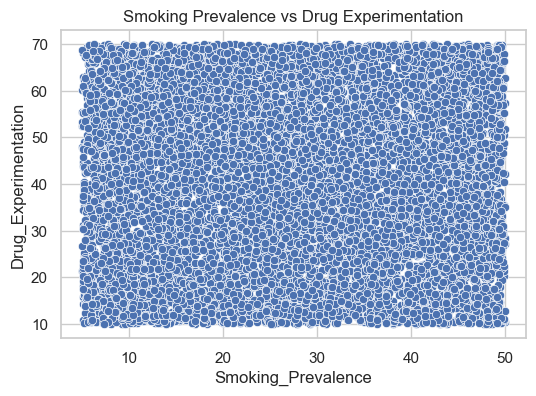

In [16]:
# 2. Smoking Prevalence vs Drug Experimentation
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Smoking_Prevalence', y='Drug_Experimentation', data=data)
plt.title('Smoking Prevalence vs Drug Experimentation')
plt.show()

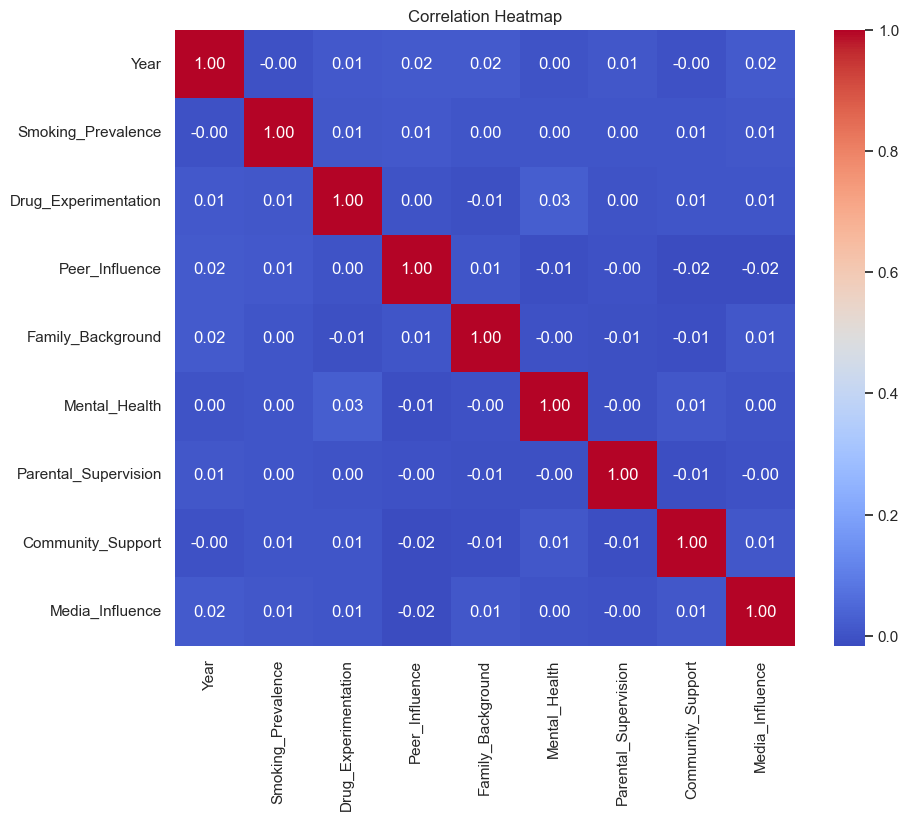

In [17]:
# 3. Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

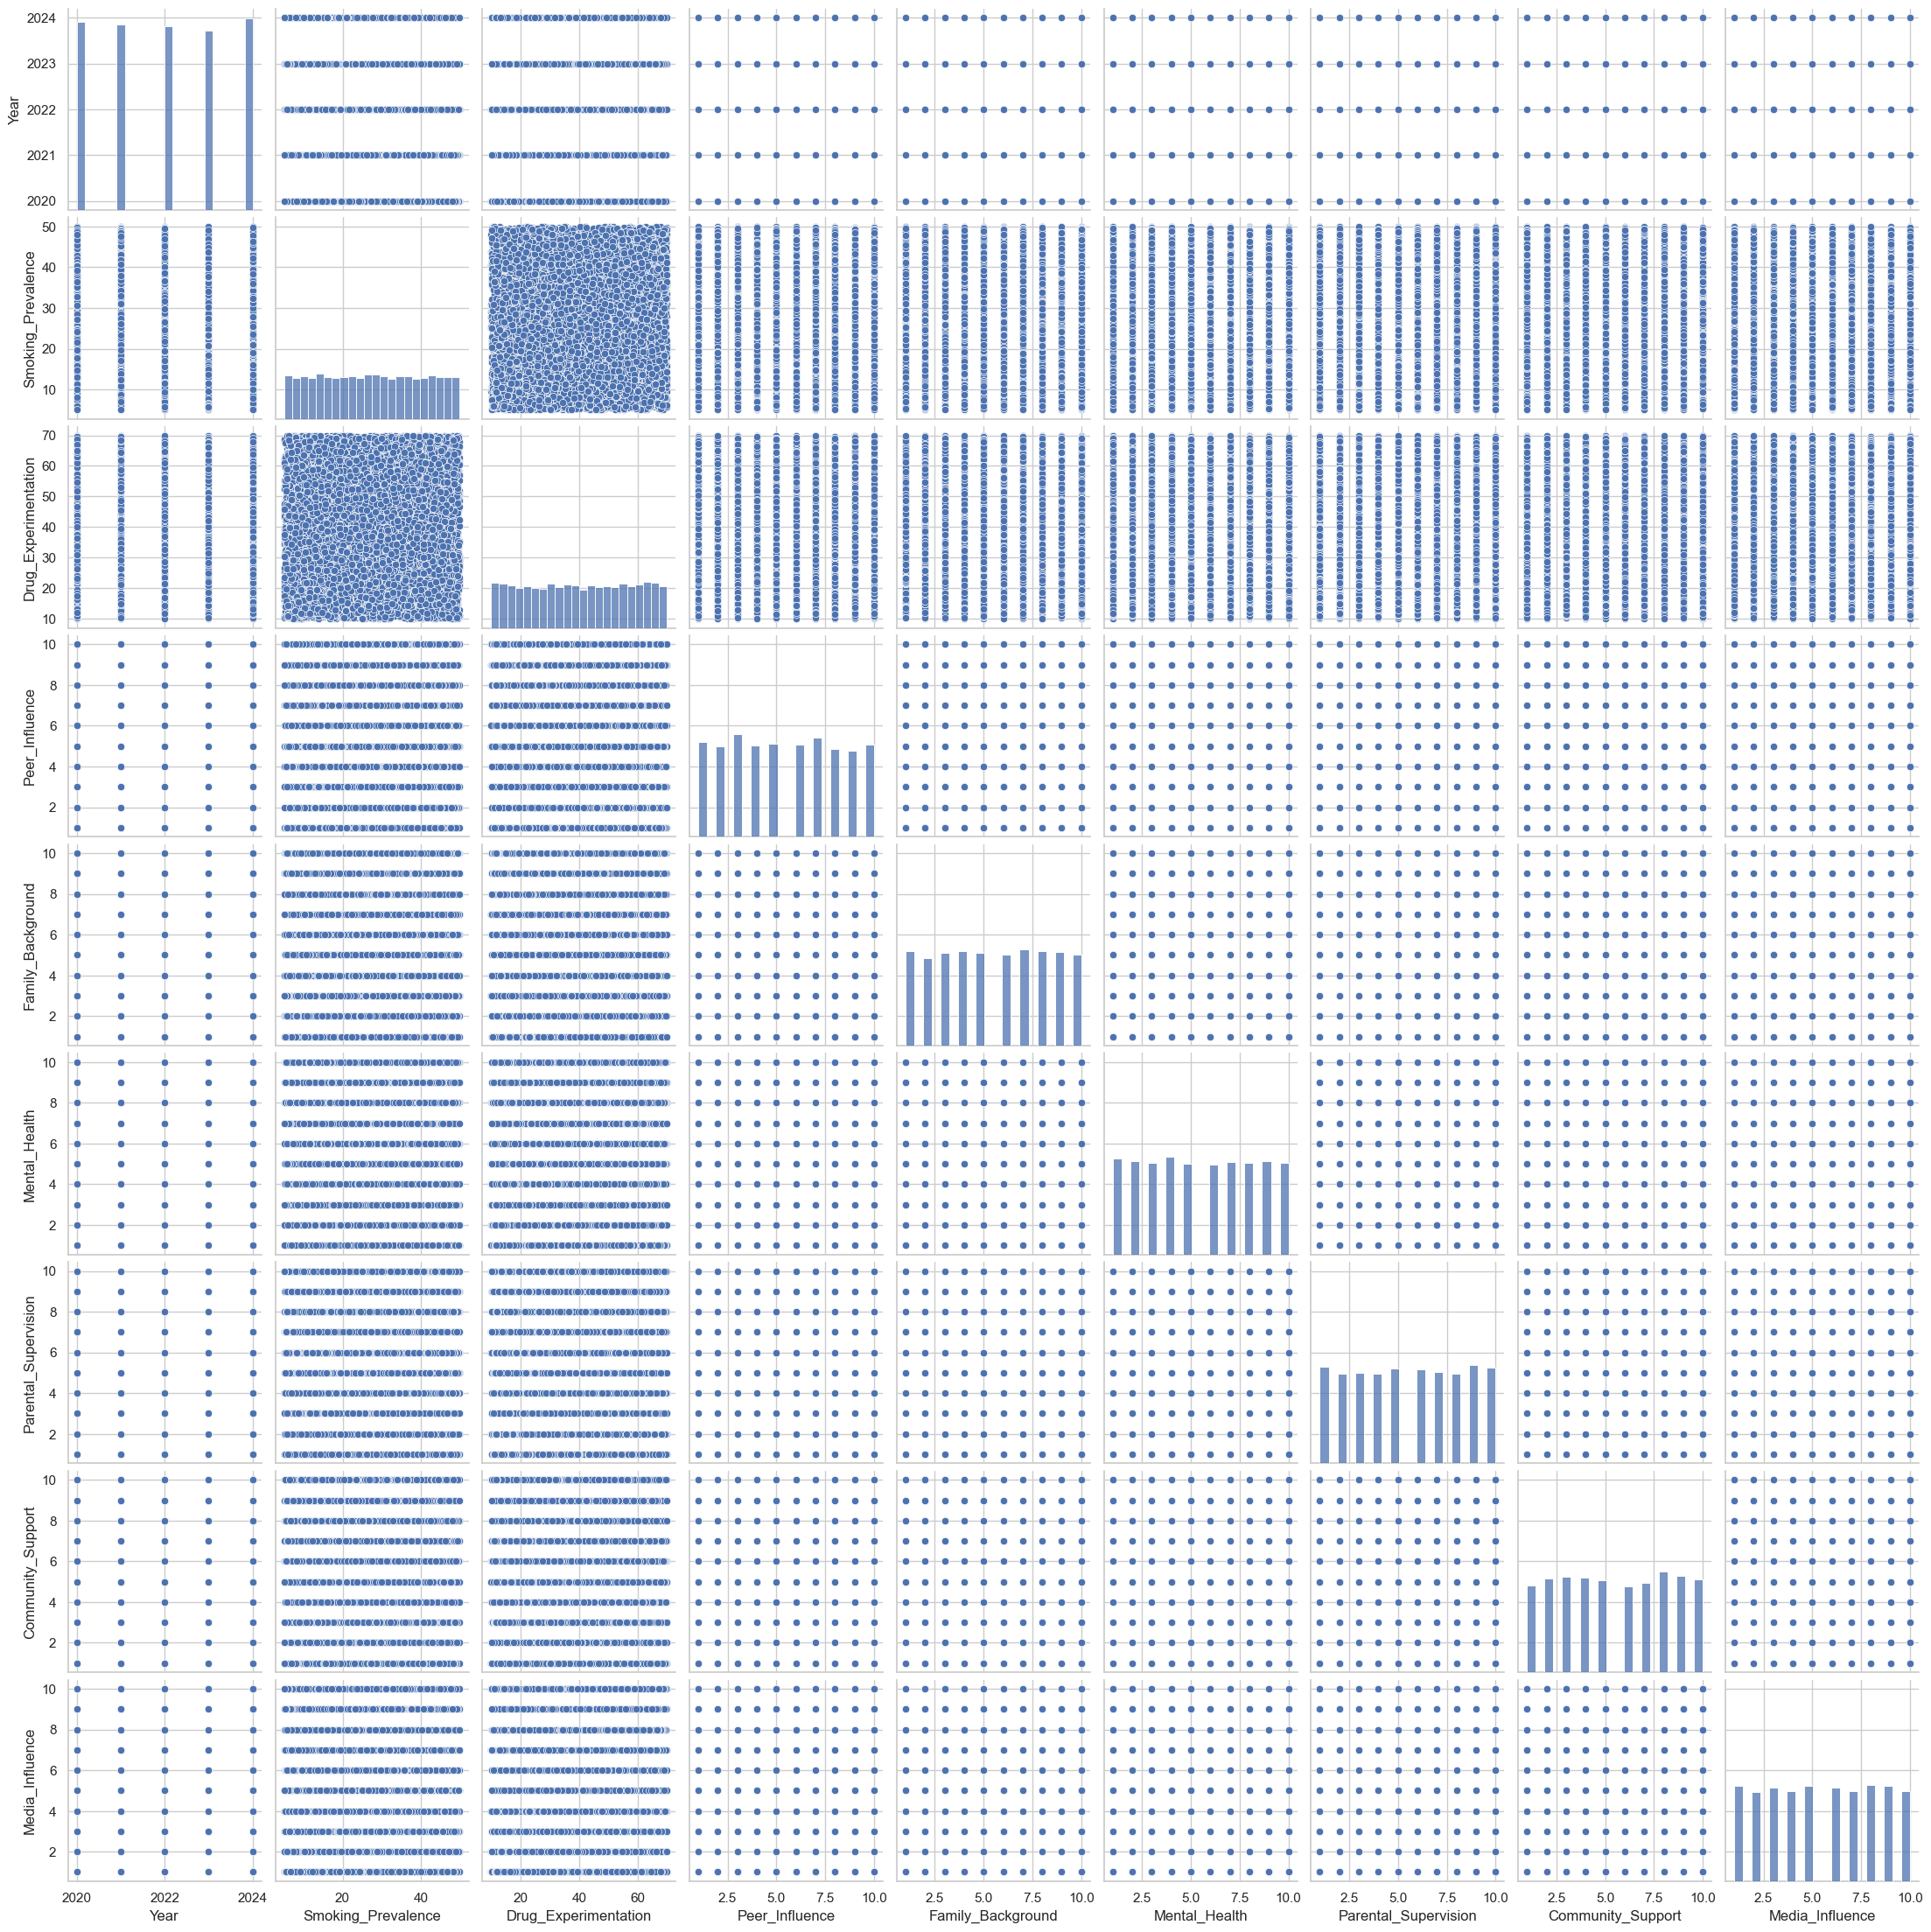

In [18]:
sns.pairplot(data)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1904\2400950895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='Set2')


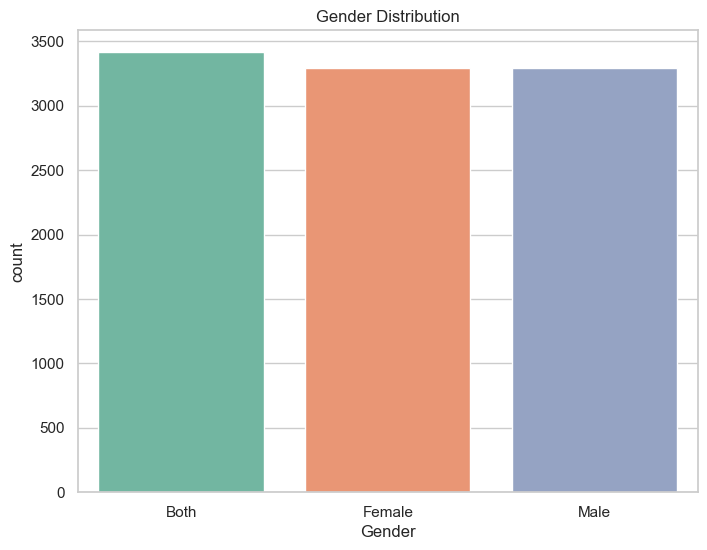

In [19]:
#Bar Plot for Gender Distribution:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_1904\3879327935.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Smoking_Prevalence', palette='Set1')


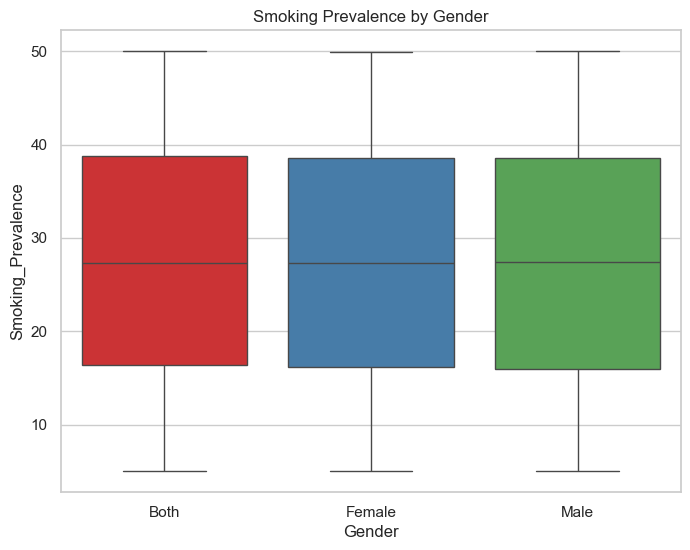

In [20]:
#Box Plot for Smoking Prevalence by Gender:

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='Smoking_Prevalence', palette='Set1')
plt.title('Smoking Prevalence by Gender')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_1904\1691965815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Age_Group', palette='Set3')


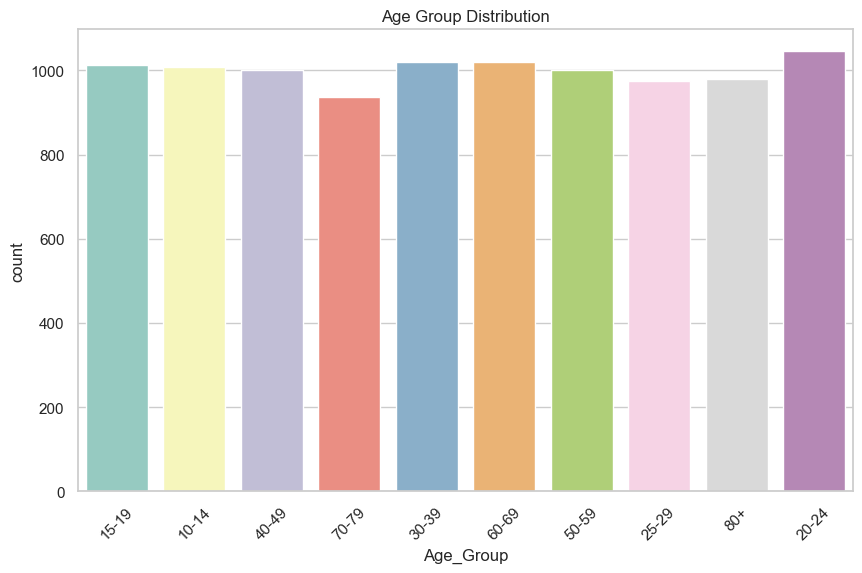

In [21]:
# Count Plot for Age Group:

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age_Group', palette='Set3')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()


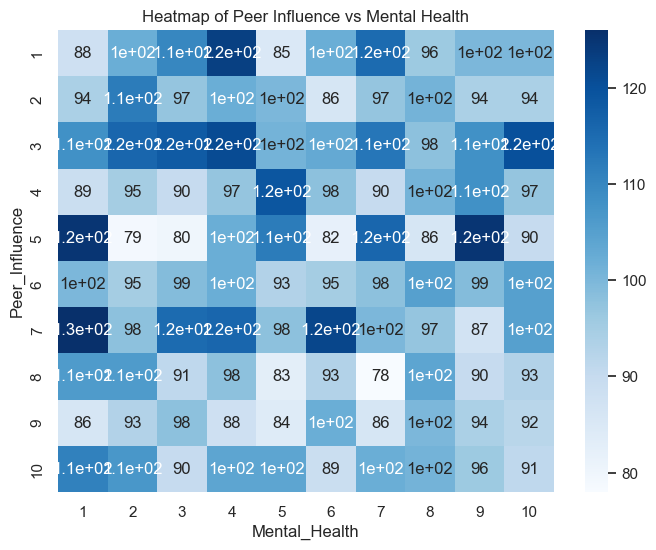

In [22]:
#Heatmap of Peer Influence vs Mental Health:

plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(data['Peer_Influence'], data['Mental_Health']), cmap='Blues', annot=True)
plt.title('Heatmap of Peer Influence vs Mental Health')
plt.show()


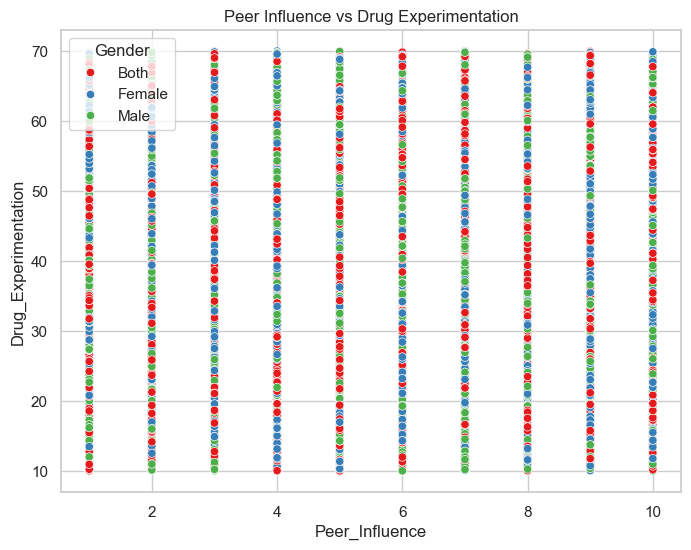

In [23]:
#Scatter Plot for Peer Influence vs Drug Experimentation:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Peer_Influence', y='Drug_Experimentation', hue='Gender', palette='Set1')
plt.title('Peer Influence vs Drug Experimentation')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_1904\99265224.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Socioeconomic_Status', palette='coolwarm')


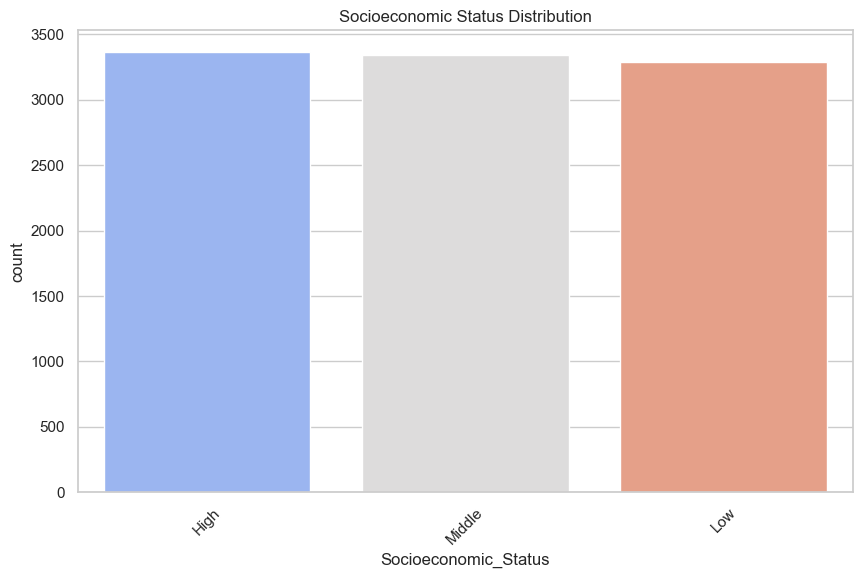

In [24]:
#Bar Plot for Socioeconomic Status:


plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Socioeconomic_Status', palette='coolwarm')
plt.title('Socioeconomic Status Distribution')
plt.xticks(rotation=45)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_1904\1937382945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Family_Background', y='Mental_Health', palette='Set2')


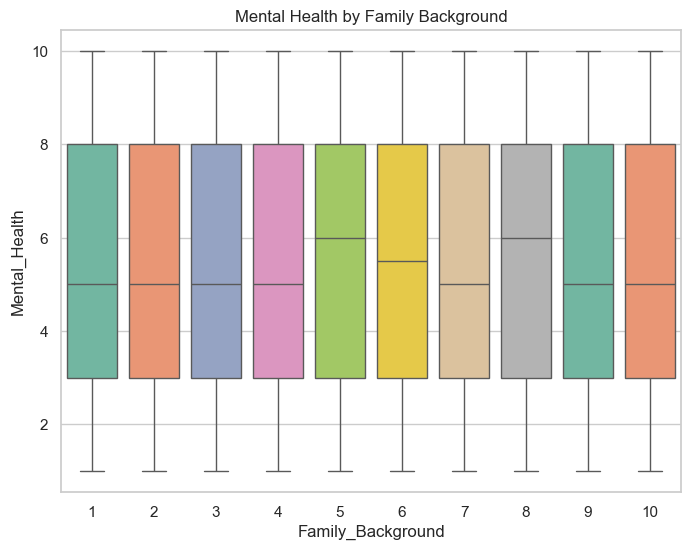

In [25]:
# Box Plot for Mental Health by Family Background:

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Family_Background', y='Mental_Health', palette='Set2')
plt.title('Mental Health by Family Background')
plt.show()


SweetViz Library

In [27]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [28]:
import sweetviz as sv

In [29]:
data= pd.read_csv('youth_smoking_drug.csv')
#test= pd.read_csv('titanic_train.csv')

In [30]:
my_report = sv.analyze(data) 

                                             |                                             | [  0%]   00:00 ->…

In [31]:
# Display the Sweetviz report
my_report.show_html("Report.html") 

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [32]:
import sweetviz as sv
sweet_report = sv.analyze(data)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [34]:
data = AV.AutoViz('youth_smoking_drug.csv')

Shape of your Data Set loaded: (10000, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    15 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variab

Number of All Scatter Plots = 3
All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [36]:
from autoviz.AutoViz_Class import AutoViz_Class


In [40]:
from autoviz import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()

Shape of your Data Set loaded: (10000, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    15 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variab

Number of All Scatter Plots = 3


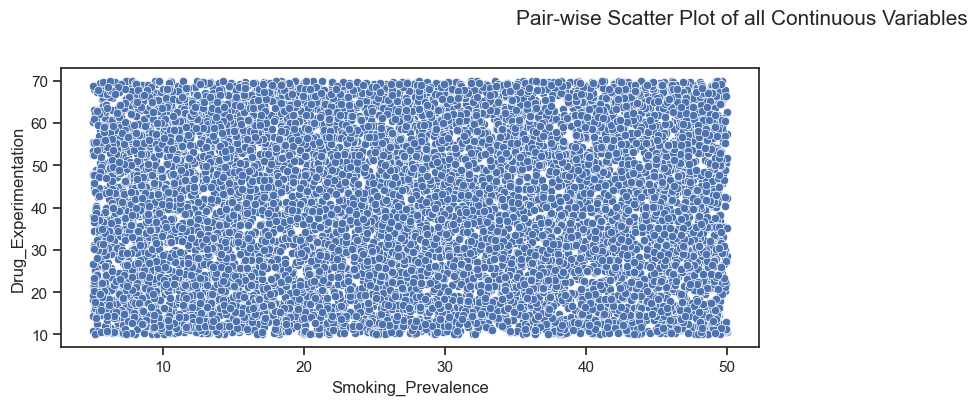

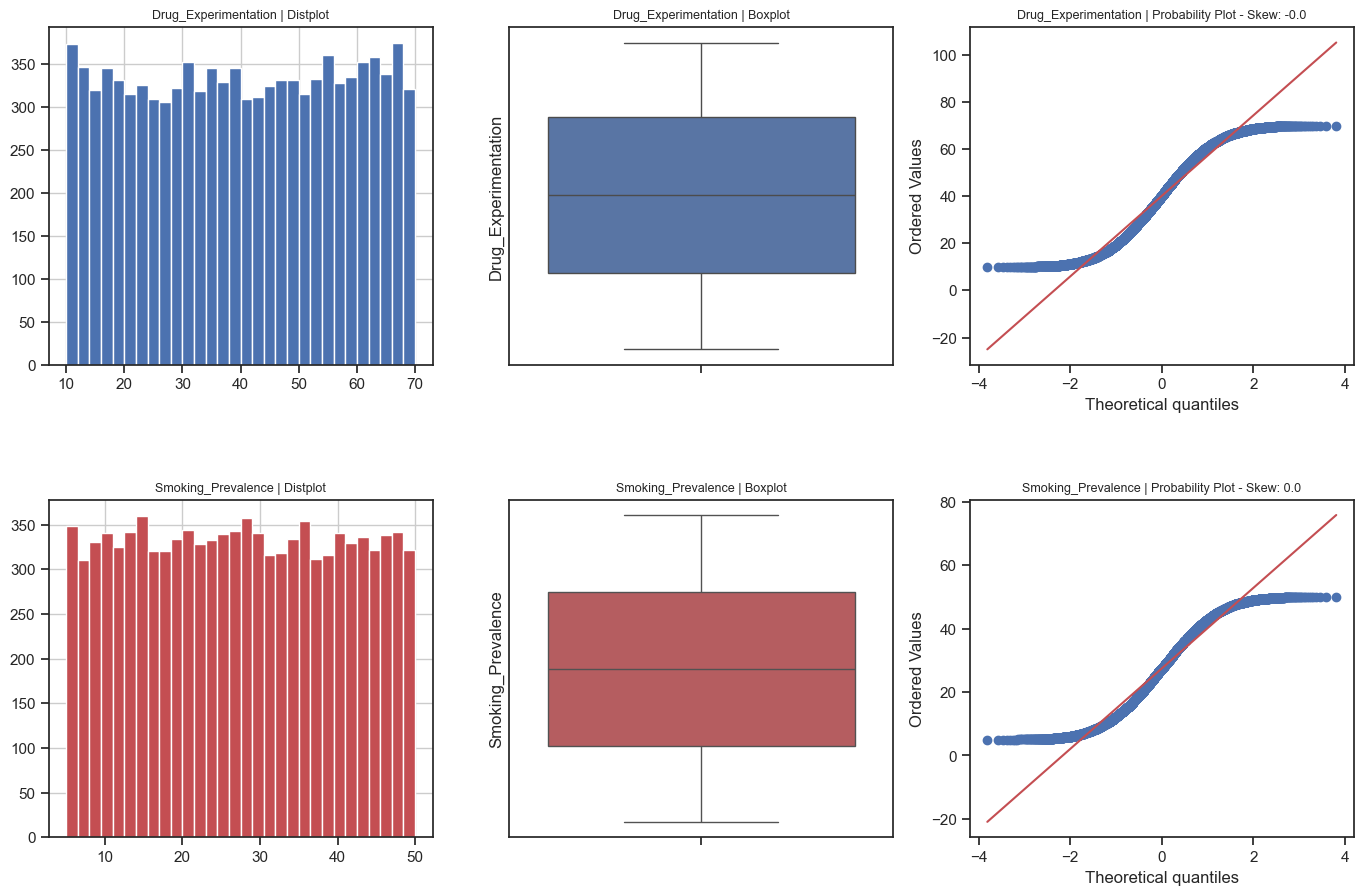

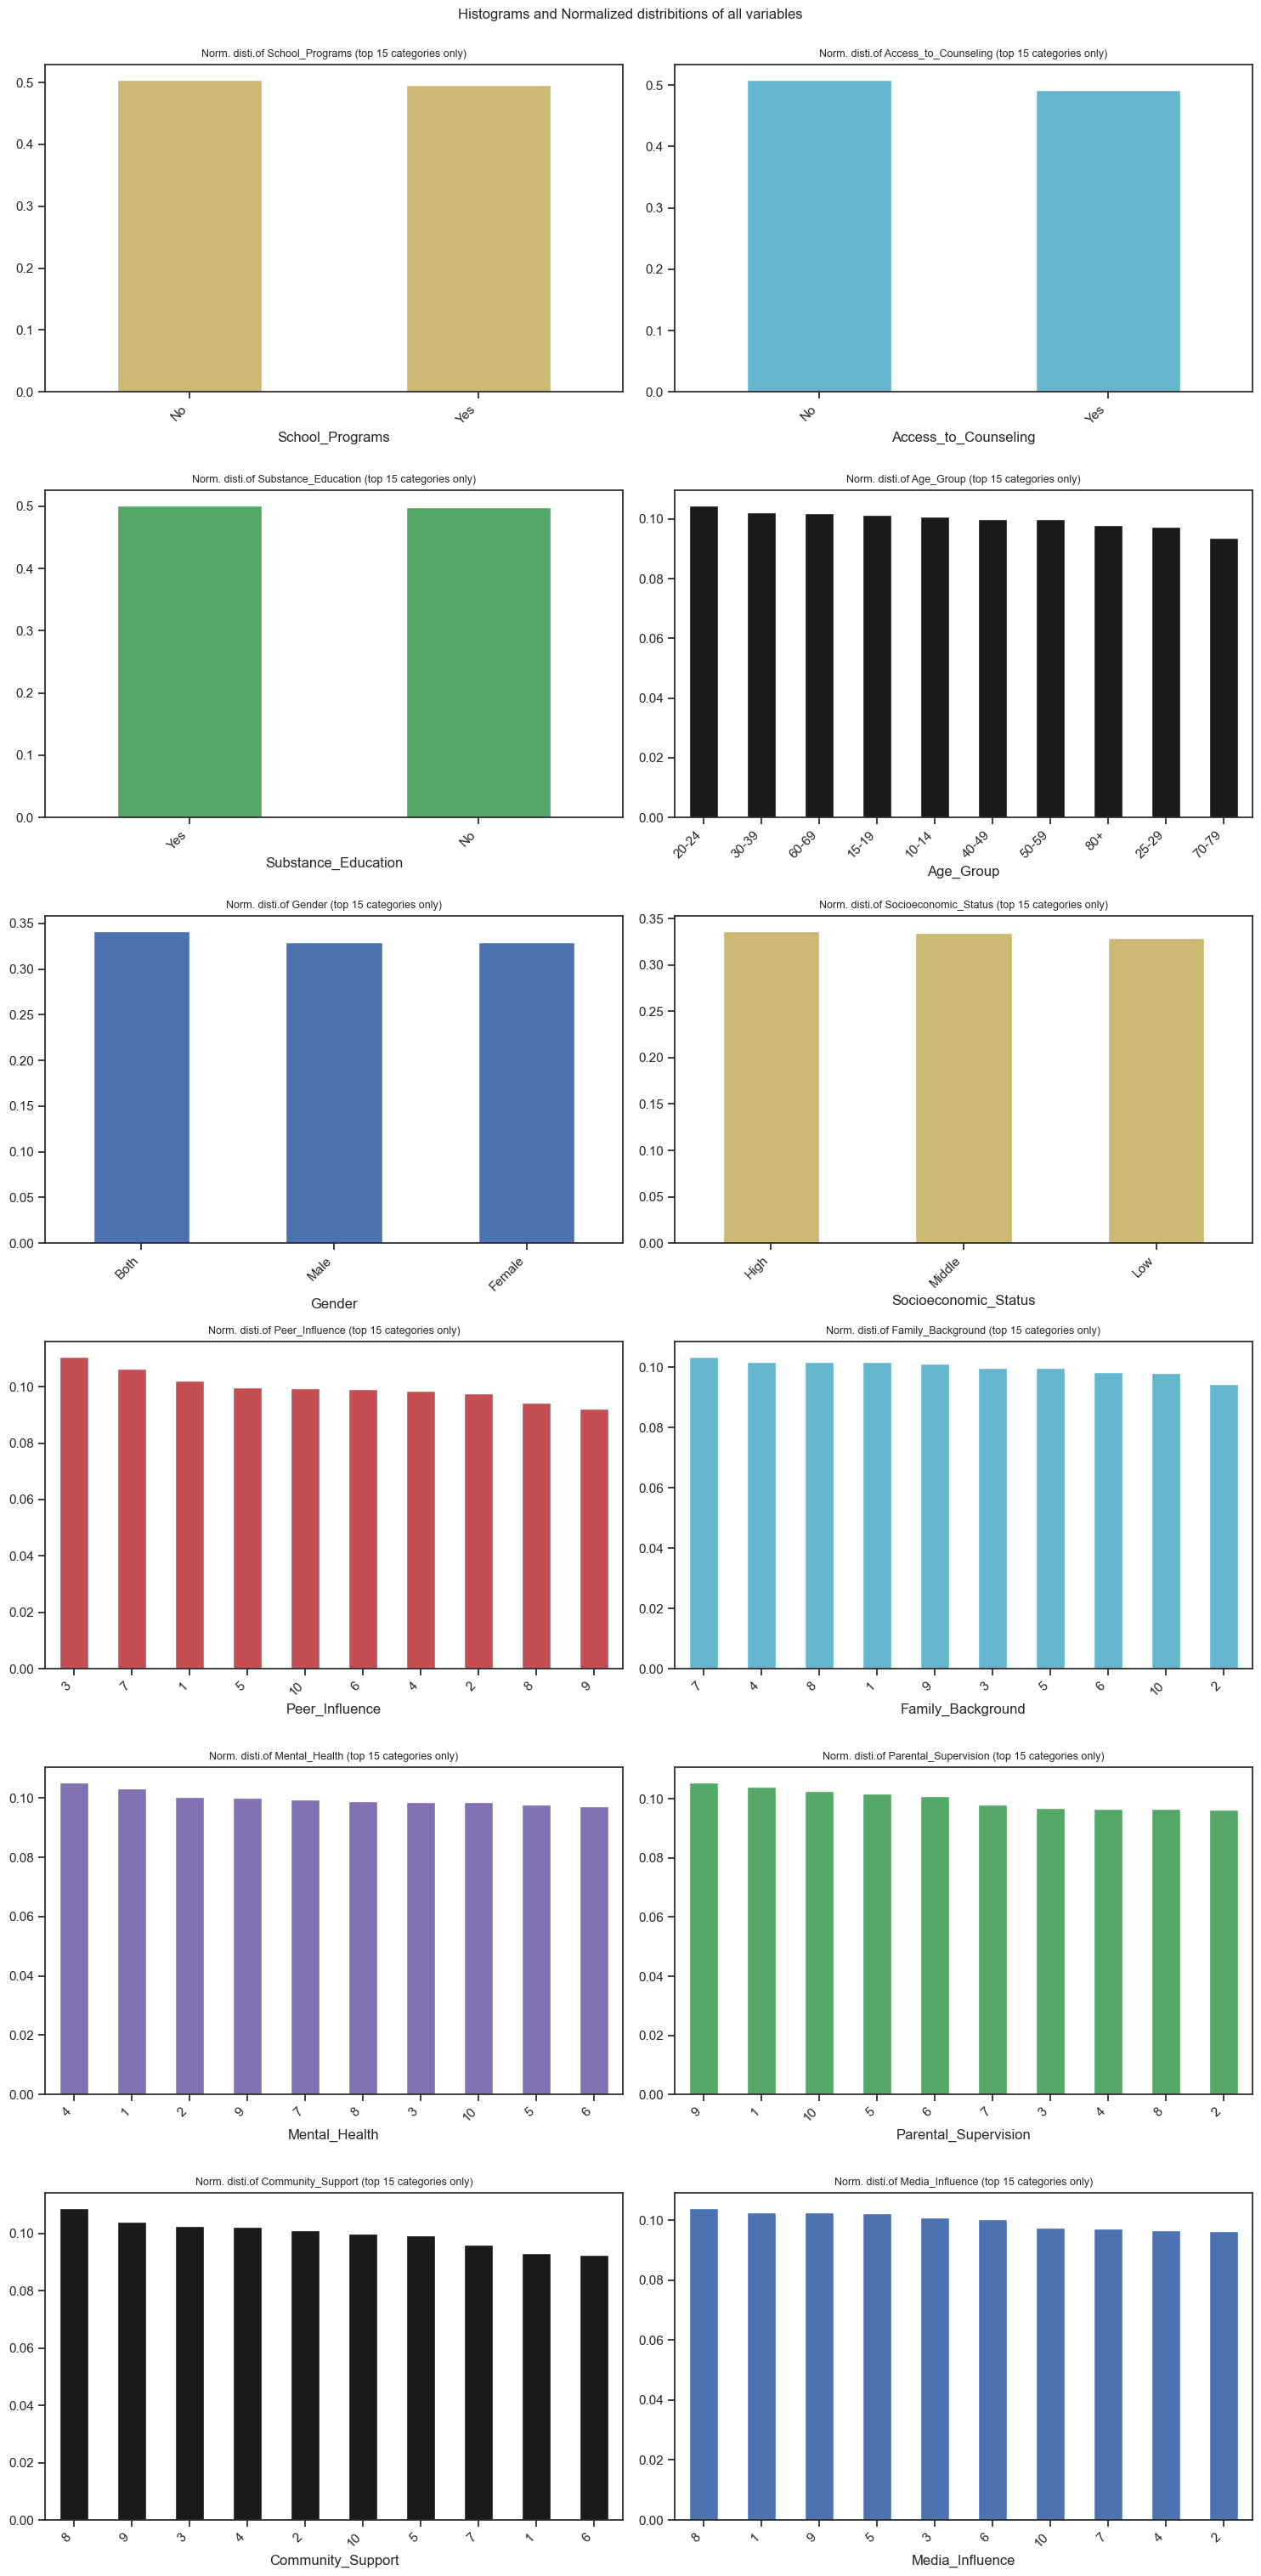

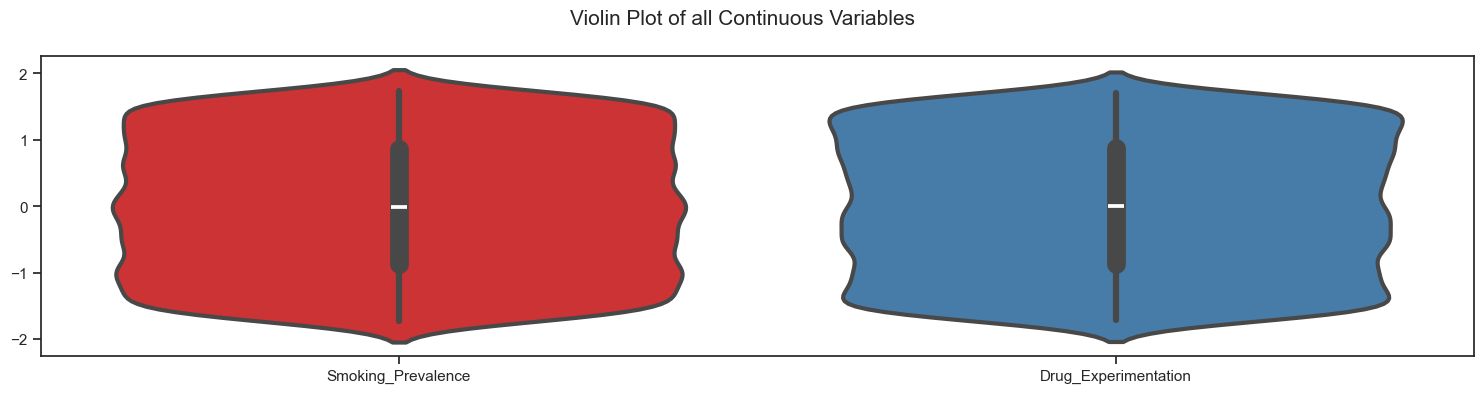

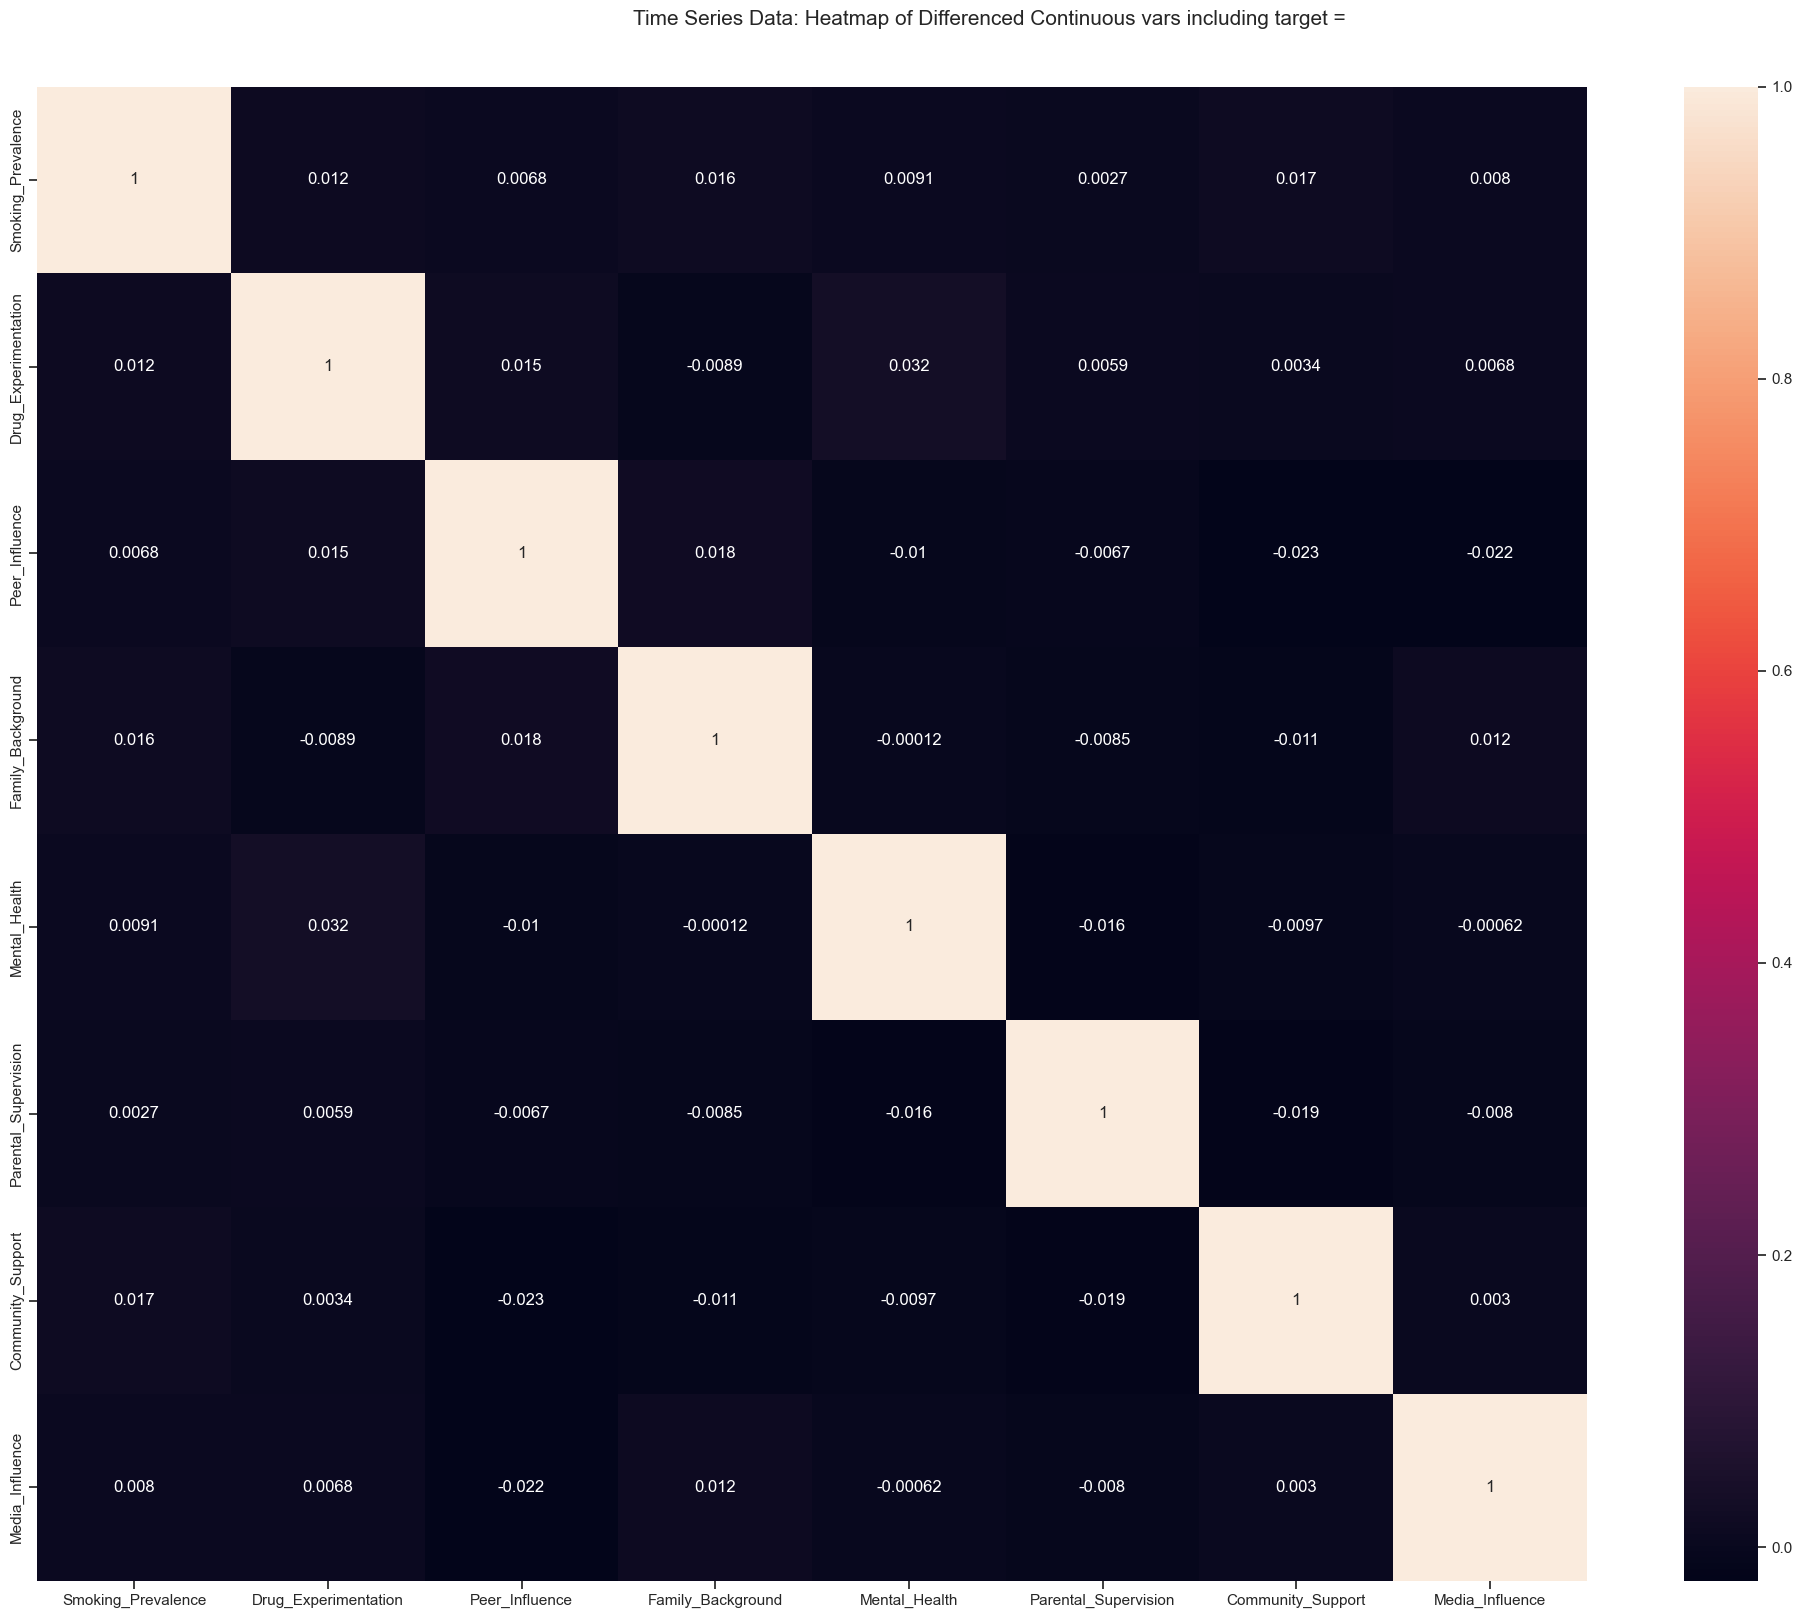

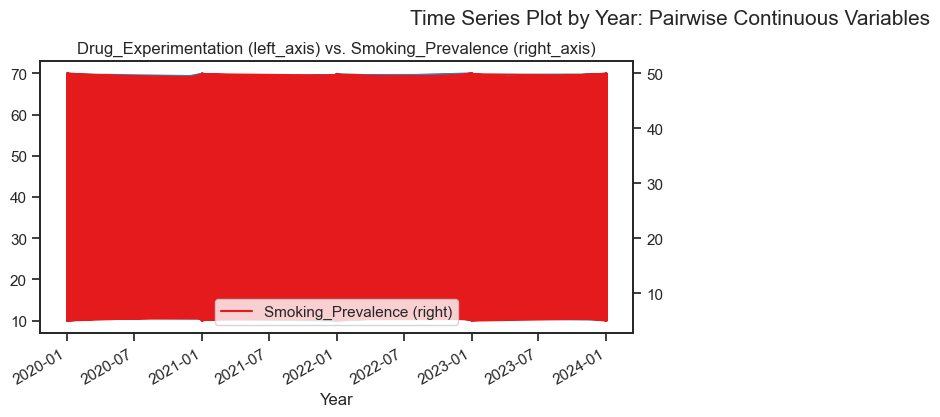

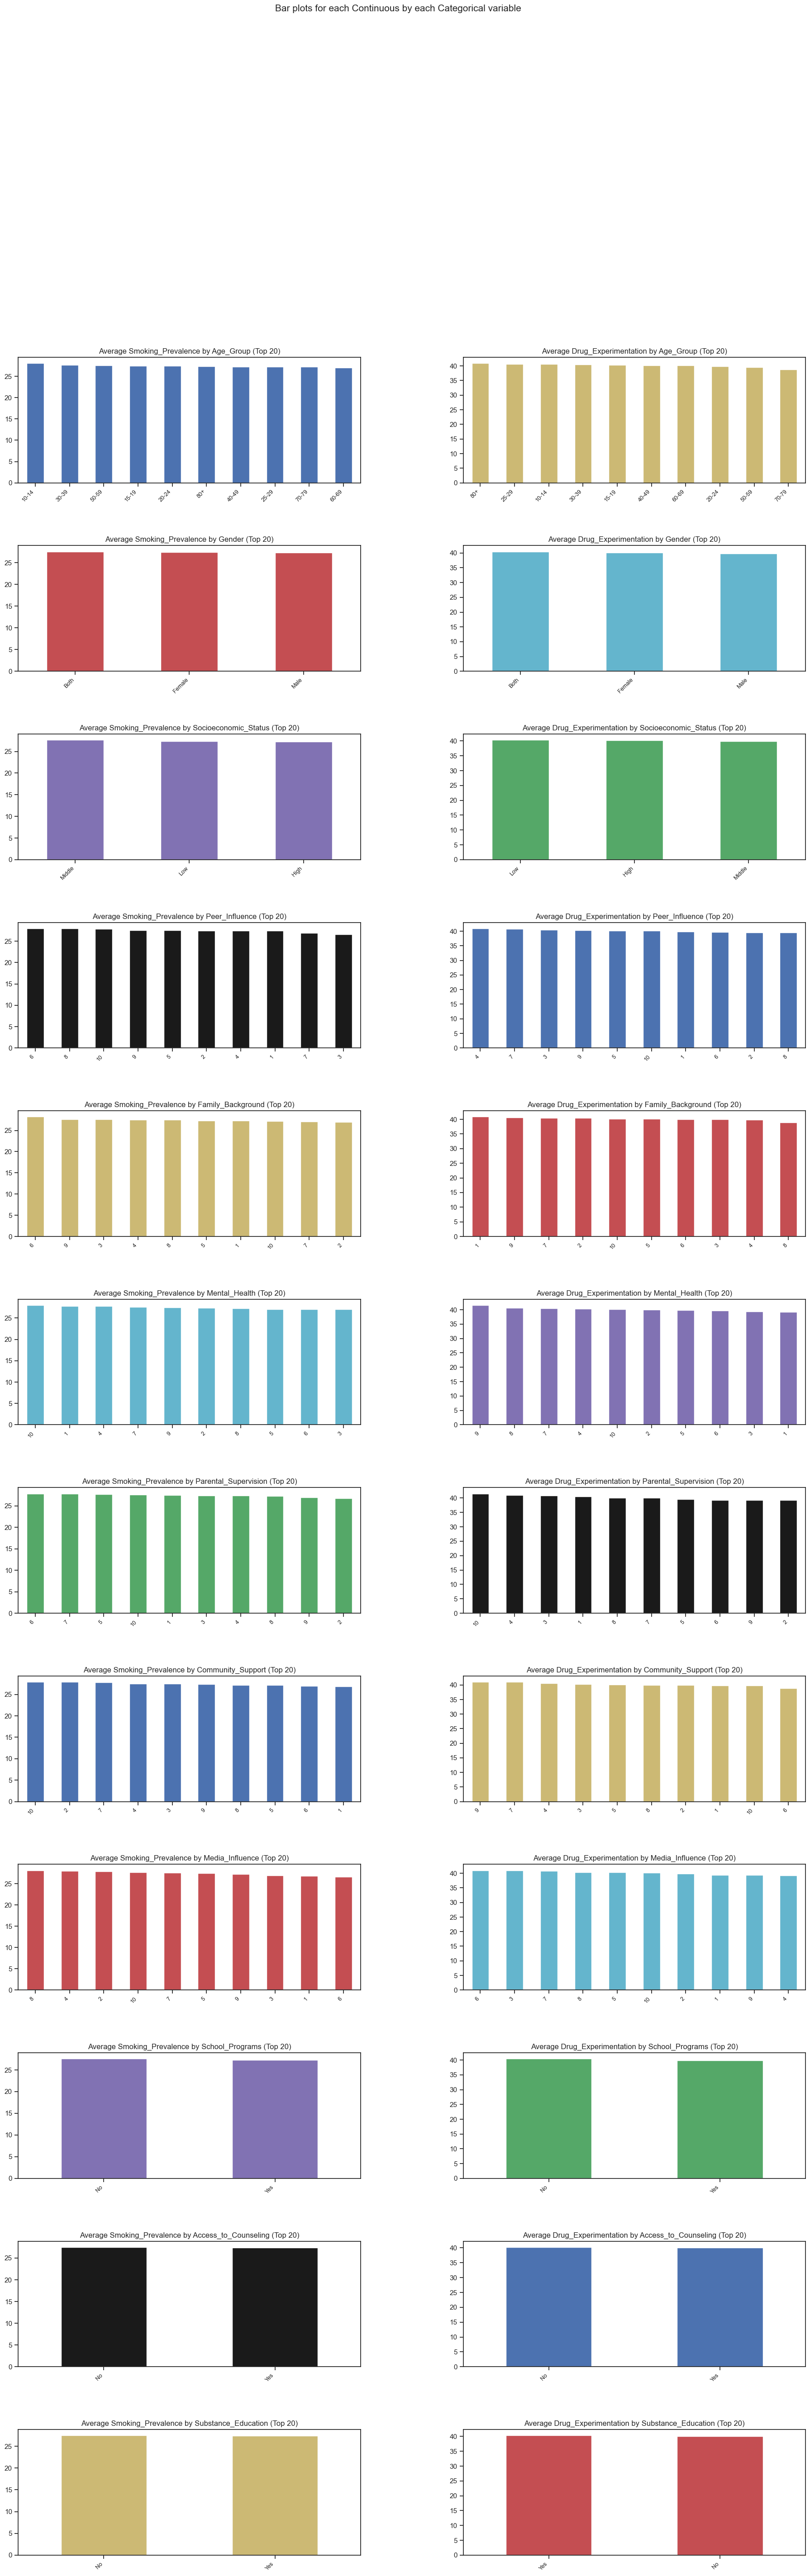

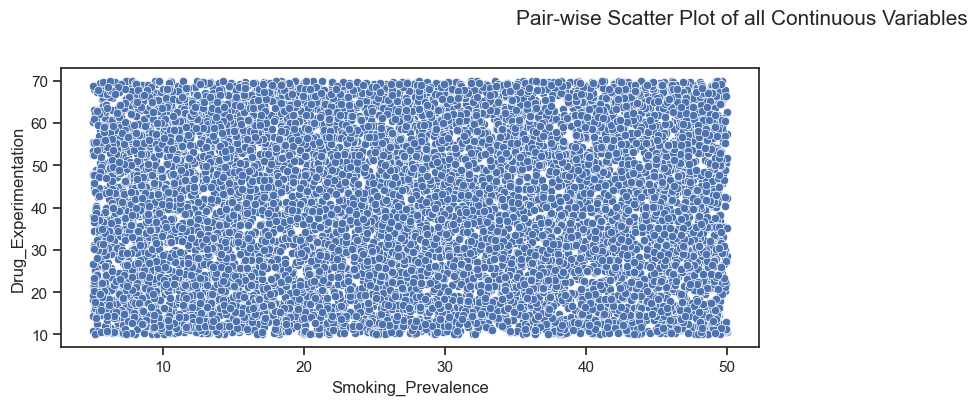

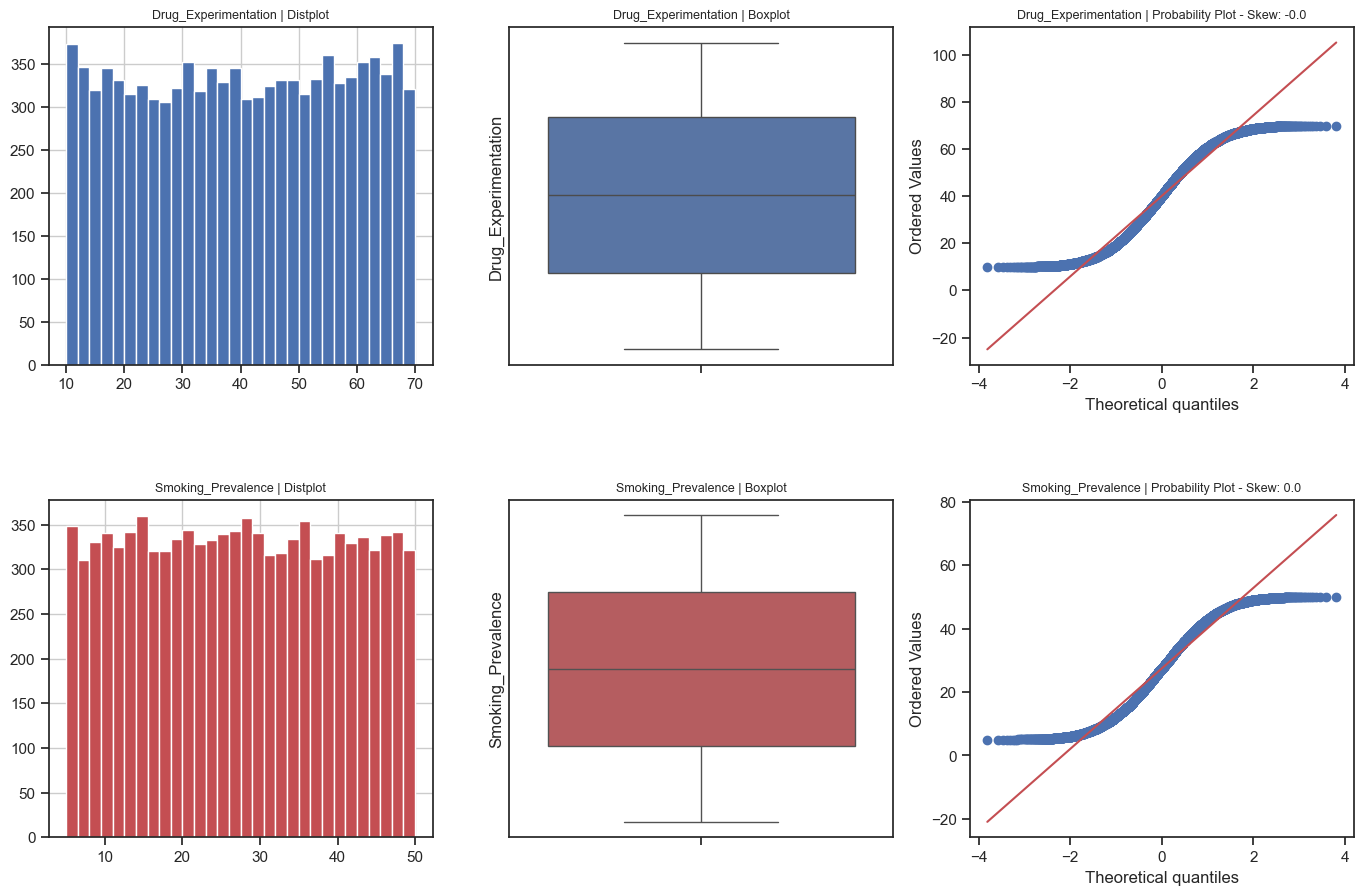

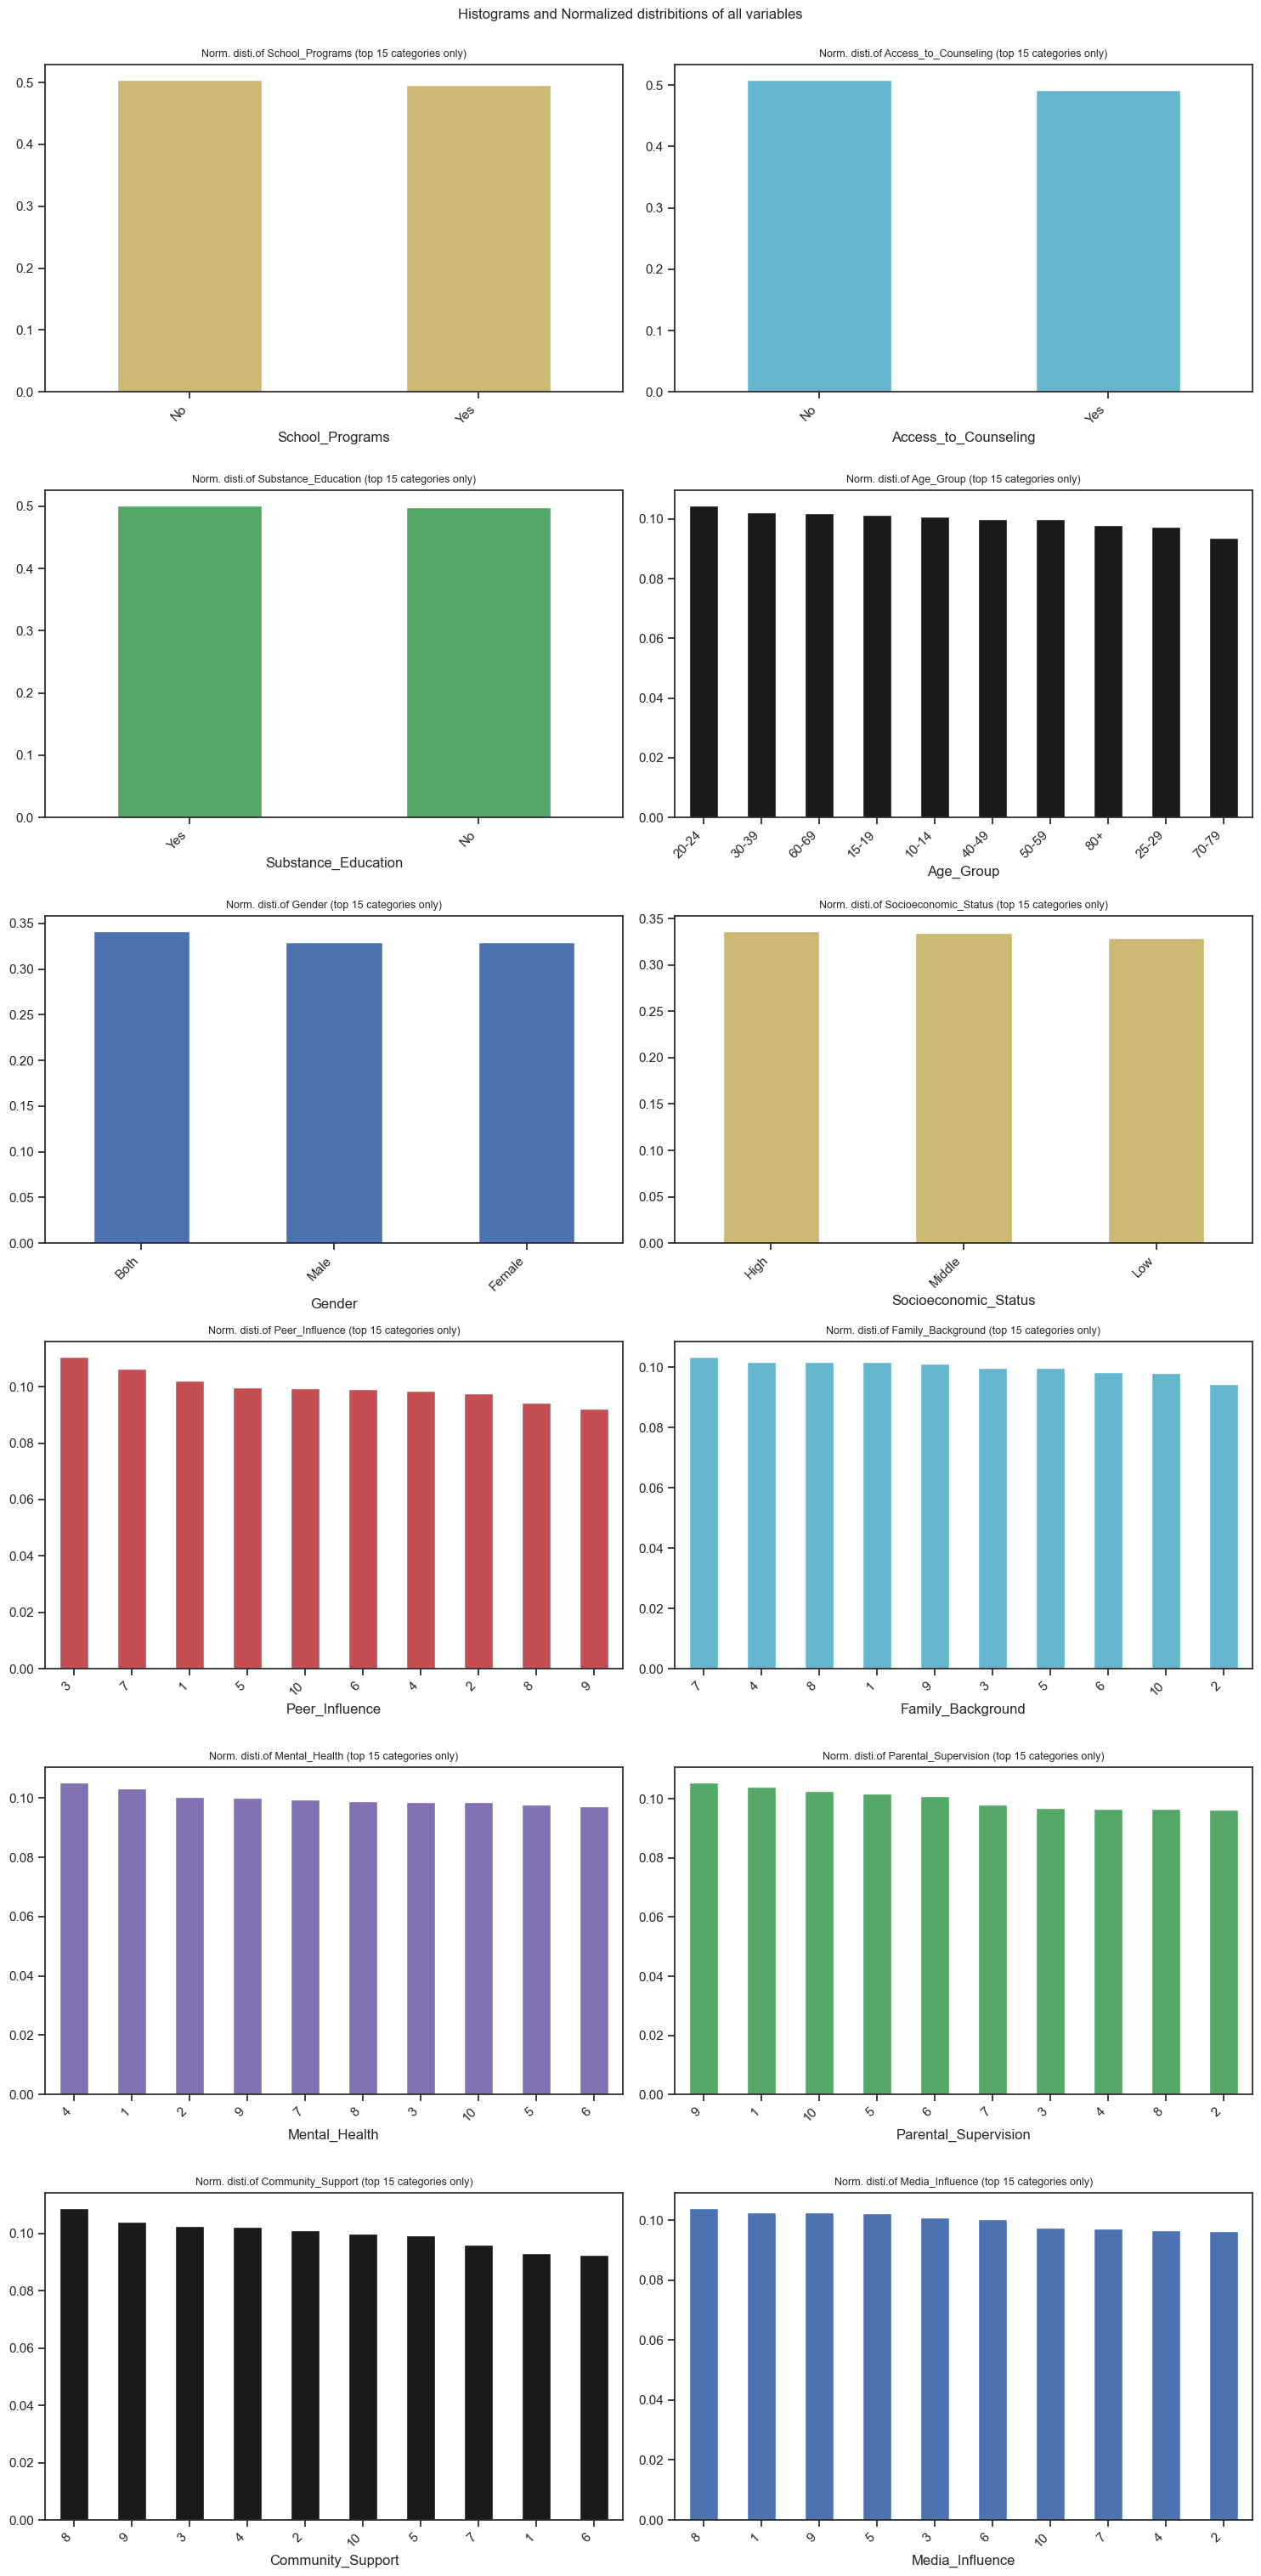

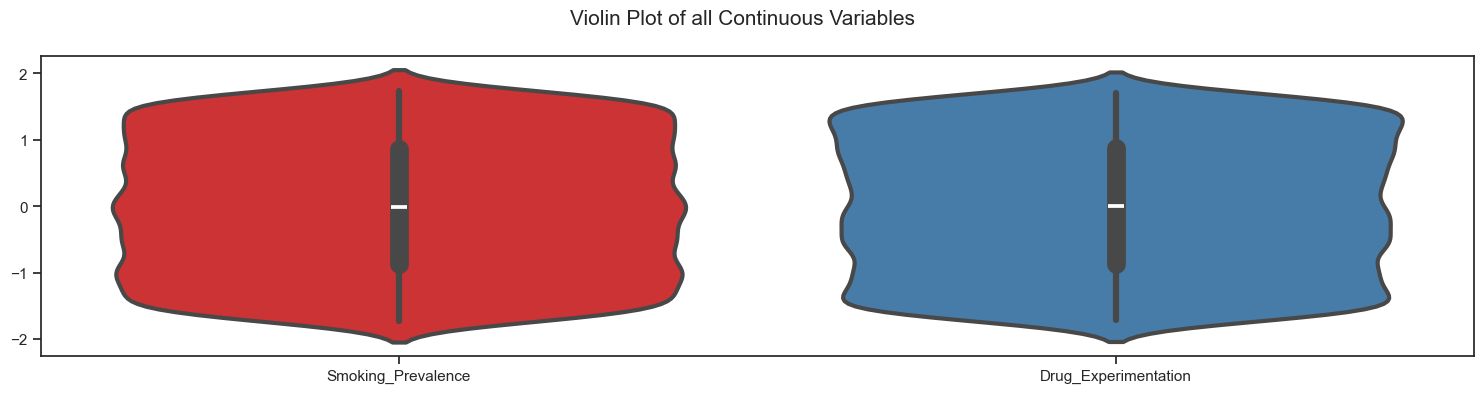

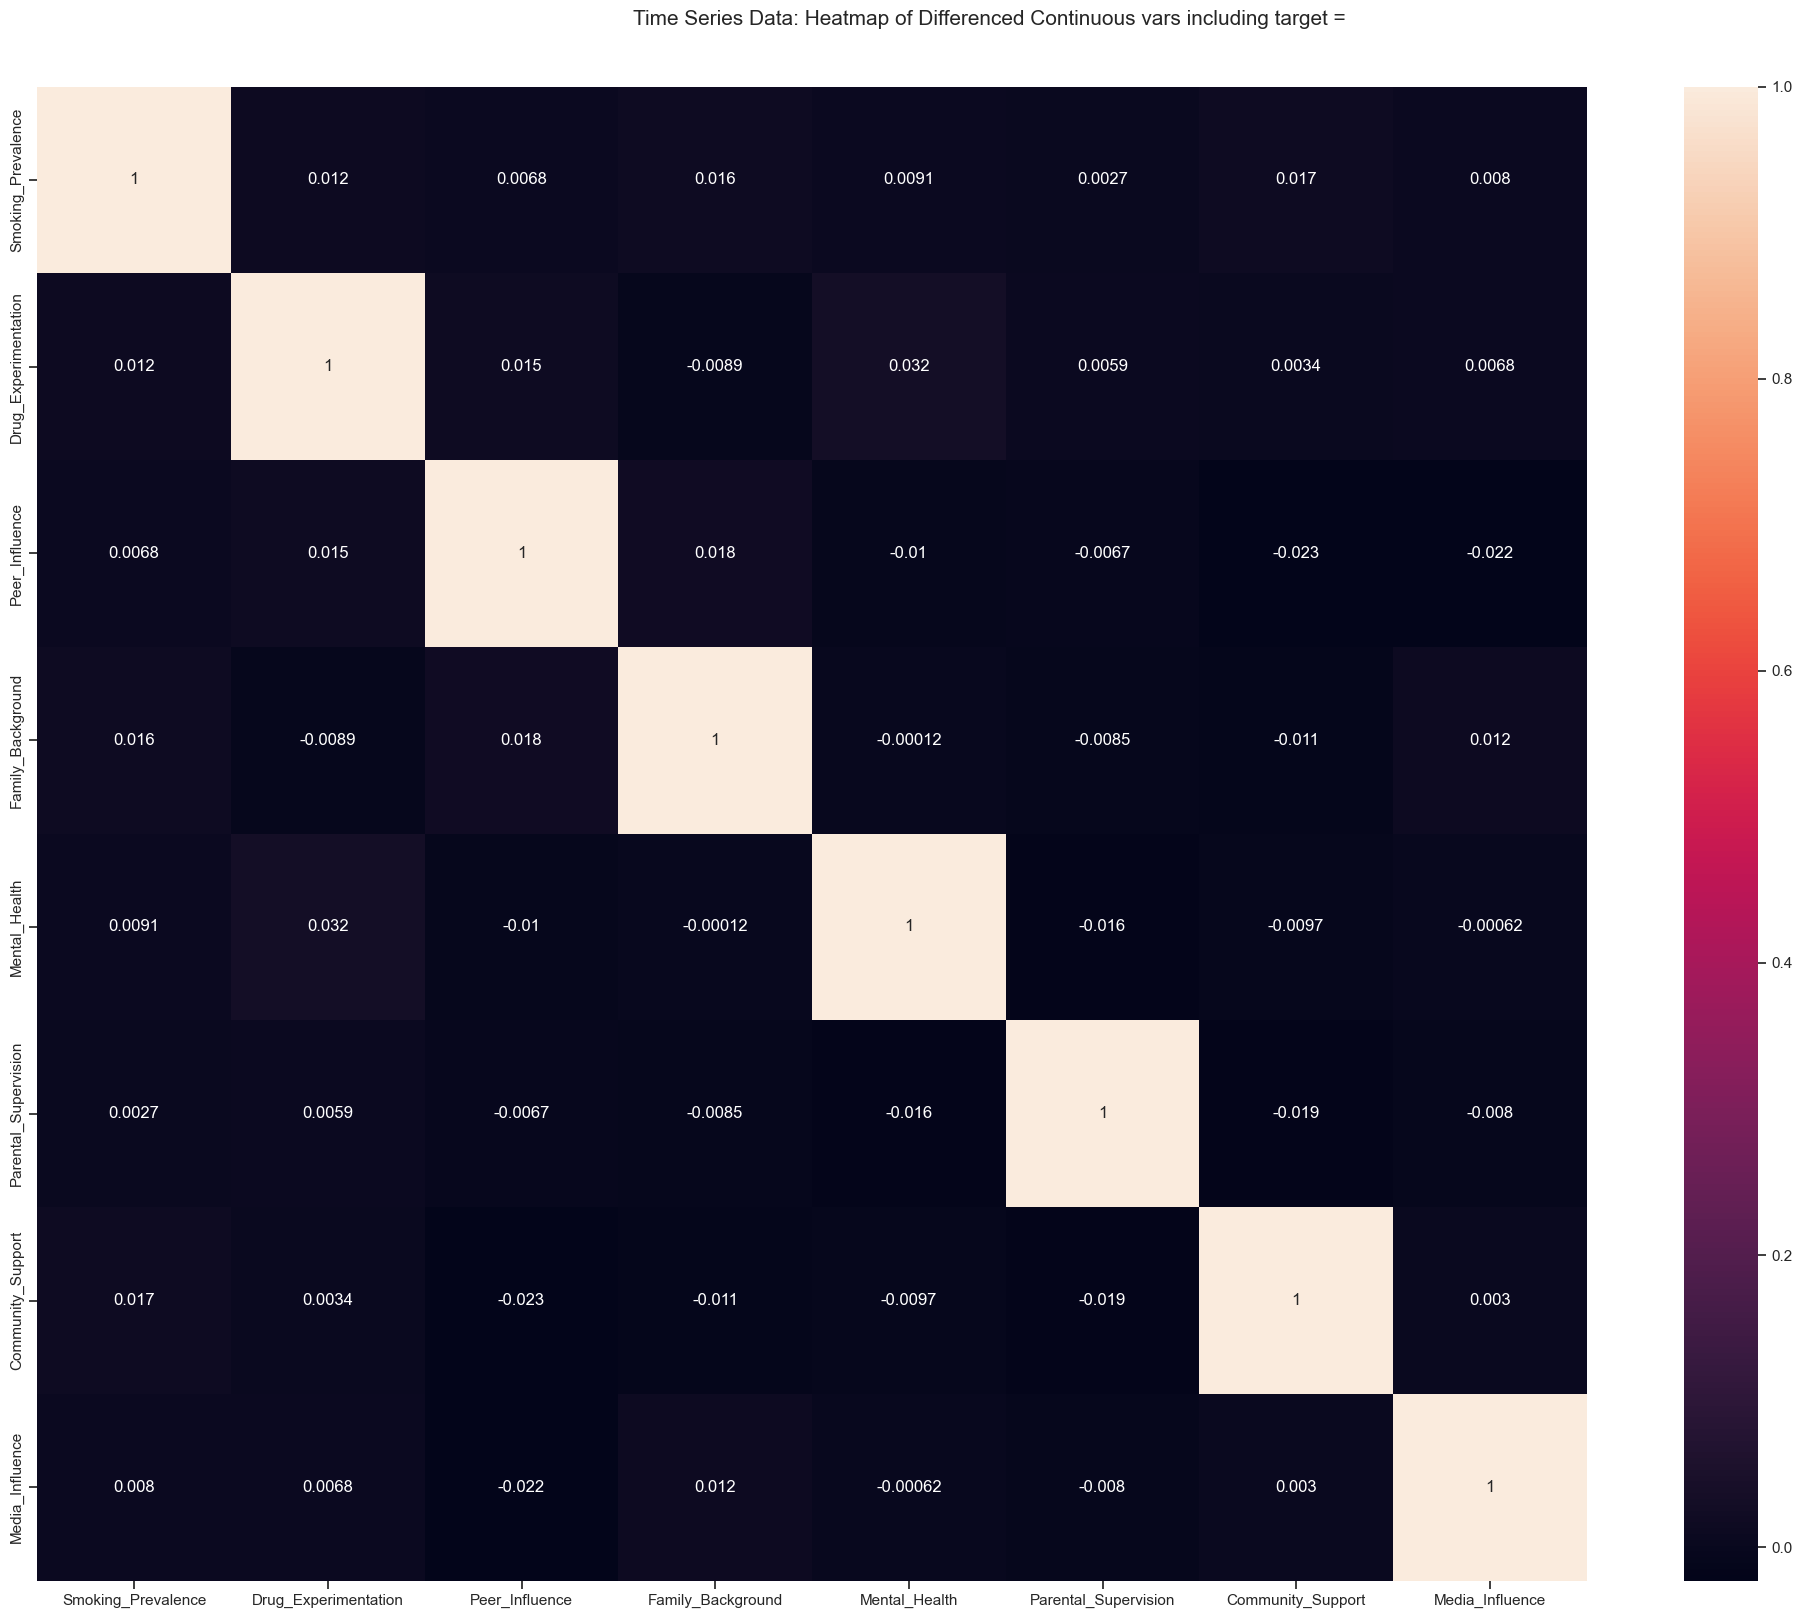

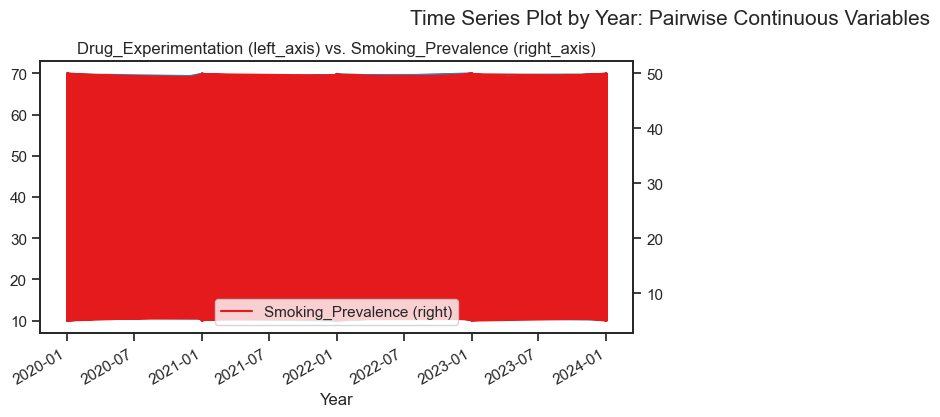

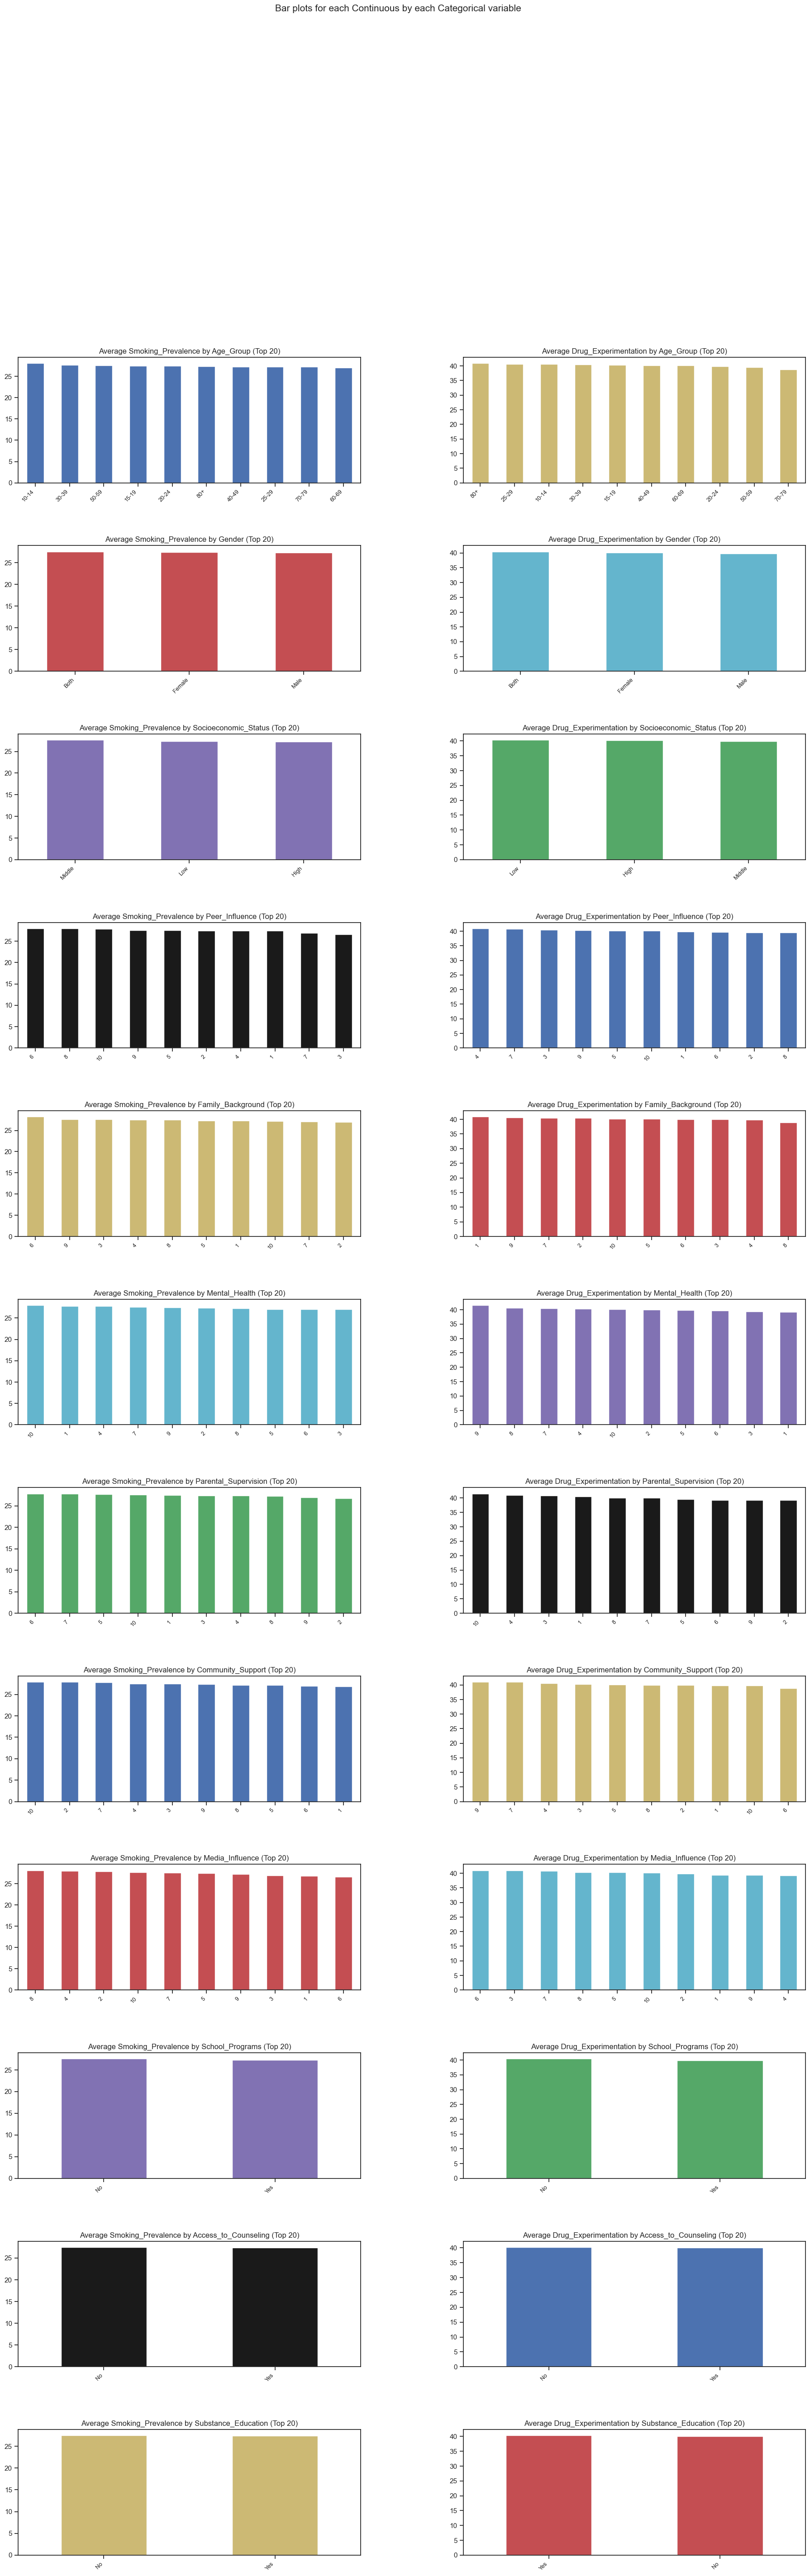

All Plots done
Time to run AutoViz = 28 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [42]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

# Load the Titanic dataset
data = pd.read_csv('youth_smoking_drug.csv')

# Instantiate the AutoViz class
AV = AutoViz_Class()

# Visualize the dataset
report = AV.AutoViz("youth_smoking_drug.csv")

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [96]:
# Select features (inputs)
X = data[['Smoking_Prevalence', 'Drug_Experimentation', 'Peer_Influence', 'Family_Background']]

# Select a new target column (e.g., 'Mental_Health' for this example)
y = data['Mental_Health']



In [98]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr= LogisticRegression()

In [104]:
lr.fit(X_train, y_train)


LogisticRegression()

In [106]:
y_pred=lr.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix,classification_report

In [110]:

confusion_matrix(y_test,y_pred)

array([[66,  9,  9, 38,  2, 12,  5,  0, 44, 11],
       [62, 12,  8, 30,  0, 21,  2,  0, 46,  8],
       [74, 17, 11, 37,  1, 14,  3,  0, 50,  8],
       [55, 18, 11, 40,  0, 18,  1,  0, 57, 13],
       [60, 15, 11, 31,  1, 13,  2,  0, 50, 14],
       [75, 20,  7, 35,  1, 19,  2,  0, 35, 11],
       [60, 13, 16, 38,  1, 13,  3,  0, 52,  3],
       [68, 14,  4, 41,  1, 17,  2,  0, 52, 12],
       [56, 11,  6, 27,  2, 18,  4,  0, 56, 15],
       [61, 11, 10, 29,  1, 15,  3,  0, 44,  6]], dtype=int64)

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.10      0.34      0.16       196
           2       0.09      0.06      0.07       189
           3       0.12      0.05      0.07       215
           4       0.12      0.19      0.14       213
           5       0.10      0.01      0.01       197
           6       0.12      0.09      0.10       205
           7       0.11      0.02      0.03       199
           8       0.00      0.00      0.00       211
           9       0.12      0.29      0.16       195
          10       0.06      0.03      0.04       180

    accuracy                           0.11      2000
   macro avg       0.09      0.11      0.08      2000
weighted avg       0.09      0.11      0.08      2000



In [114]:
from sklearn.tree import DecisionTreeClassifier



In [116]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
y_pred=dtc.predict(X_test)

In [120]:
confusion_matrix(y_test,y_pred)

array([[19, 21, 18, 24, 25, 22, 16, 24, 14, 13],
       [14, 14, 14, 26, 20, 23, 17, 25, 17, 19],
       [23, 21, 22, 18, 18, 24, 16, 27, 23, 23],
       [18, 24, 20, 29, 15, 20, 17, 21, 23, 26],
       [17, 25, 13, 19, 17, 21, 20, 16, 26, 23],
       [24, 26, 21, 21, 22, 17, 18, 15, 17, 24],
       [20, 22, 21, 19, 20, 16, 26, 15, 16, 24],
       [22, 16, 23, 21, 19, 16, 29, 22, 21, 22],
       [18, 23, 14, 24, 16, 22, 18, 21, 22, 17],
       [14, 26, 14, 24, 12, 22, 19, 17, 12, 20]], dtype=int64)

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.10      0.10      0.10       196
           2       0.06      0.07      0.07       189
           3       0.12      0.10      0.11       215
           4       0.13      0.14      0.13       213
           5       0.09      0.09      0.09       197
           6       0.08      0.08      0.08       205
           7       0.13      0.13      0.13       199
           8       0.11      0.10      0.11       211
           9       0.12      0.11      0.11       195
          10       0.09      0.11      0.10       180

    accuracy                           0.10      2000
   macro avg       0.10      0.10      0.10      2000
weighted avg       0.10      0.10      0.10      2000



In [124]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rfc= RandomForestClassifier(1000)


In [128]:
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=1000)

In [129]:
y_pred= rfc.predict(X_test)


In [130]:
confusion_matrix(y_test,y_pred)


array([[21, 22, 15, 24, 19, 15, 18, 22, 27, 13],
       [19, 14, 16, 30, 13, 21, 18, 23, 13, 22],
       [25, 23, 20, 15, 16, 16, 25, 26, 19, 30],
       [15, 25, 15, 30, 17, 25, 17, 21, 21, 27],
       [20, 26, 22, 19, 20, 25, 16, 10, 19, 20],
       [24, 22, 26, 18, 19, 21, 17, 19, 21, 18],
       [26, 17, 23, 21, 16, 17, 17, 21, 16, 25],
       [20, 23, 14, 27, 23, 22, 15, 28, 19, 20],
       [22, 25, 22, 16, 12, 18, 25, 14, 21, 20],
       [15, 21, 12, 18, 18, 14, 13, 24, 21, 24]], dtype=int64)

In [131]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.10      0.11      0.10       196
           2       0.06      0.07      0.07       189
           3       0.11      0.09      0.10       215
           4       0.14      0.14      0.14       213
           5       0.12      0.10      0.11       197
           6       0.11      0.10      0.11       205
           7       0.09      0.09      0.09       199
           8       0.13      0.13      0.13       211
           9       0.11      0.11      0.11       195
          10       0.11      0.13      0.12       180

    accuracy                           0.11      2000
   macro avg       0.11      0.11      0.11      2000
weighted avg       0.11      0.11      0.11      2000



In [136]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build ANN model
ann = Sequential()
ann.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1))

# Compile the model
ann.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
ann.fit(X_train, y_train, epochs=50, batch_size=10)

# Predictions
y_pred_ann = ann.predict(X_test)

# Evaluation
mse_ann = mean_squared_error(y_test, y_pred_ann)
print(f'ANN Mean Squared Error: {mse_ann}')

Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 47.0809
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.5221
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.4043
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.2563
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.8620
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.8154
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.8372
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.7385
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.7933
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.6609
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.6109
Epoch 12/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.4616
Epoch 13/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.7193
Epoch 14/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.4707
Epoch 15/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - l